In [ ]:
#USANDO AS BIBLIOTECAS DO NOTEBOOK DA CODENATION
import functools
from math import sqrt

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import scipy.stats as sct
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_blobs, make_classification
from sklearn.decomposition import PCA
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.base import BaseEstimator, TransformerMixin


In [ ]:
#criando o dataset
dados = pd.read_csv('dataset_desafio_2.csv')

In [ ]:
#visualizando dados iniciais
dados.head(10)


,MATRICULA,NOME,REPROVACOES_DE,REPROVACOES_EM,REPROVACOES_MF,REPROVACOES_GO,NOTA_DE,NOTA_EM,NOTA_MF,NOTA_GO,INGLES,H_AULA_PRES,TAREFAS_ONLINE,FALTAS,PERFIL
0,502375,Márcia Illiglener,0,0,0,0,6.2,5.8,4.6,5.9,0.0,2,4,3,EXATAS
1,397093,Jason Jytereoman Izoimum,0,0,0,0,6.0,6.2,5.2,4.5,1.0,2,4,3,EXATAS
2,915288,Bartolomeu Inácio da Gama,0,0,0,0,7.3,6.7,7.1,7.2,0.0,5,0,3,HUMANAS
3,192652,Fernanda Guedes,1,3,1,1,0.0,0.0,0.0,0.0,1.0,4,4,4,DIFICULDADE
4,949491,Alessandre Borba Gomes,1,3,1,1,0.0,0.0,0.0,0.0,1.0,5,2,5,DIFICULDADE
5,627360,Magali Hellen Gejibaflião,0,0,0,0,7.3,7.4,7.6,6.5,1.0,5,3,5,HUMANAS
6,804493,Tiago Brisu Pires,0,0,0,0,5.8,6.0,7.3,5.1,1.0,5,2,6,DIFICULDADE
7,433789,Andressa Gabrielle da Silva,0,0,0,0,4.9,5.0,5.9,4.6,NaN,2,2,6,DIFICULDADE
8,178335,Gilmar Oséas Etonvic,0,0,0,0,4.4,4.8,4.7,4.6,1.0,3,4,4,DIFICULDADE
9,987229,Otávia Mônica Noopu,0,0,0,0,6.4,5.4,5.0,5.5,1.0,3,5,3,EXATAS


In [ ]:
#visualizando o tamanho
dados.shape

(20000, 15)

In [ ]:
#excluindo a coluna 'NOME'
dados.drop(['NOME'], axis=1, inplace=True)

In [ ]:
#nova visualização
dados.head()

,MATRICULA,REPROVACOES_DE,REPROVACOES_EM,REPROVACOES_MF,REPROVACOES_GO,NOTA_DE,NOTA_EM,NOTA_MF,NOTA_GO,INGLES,H_AULA_PRES,TAREFAS_ONLINE,FALTAS,PERFIL
0,502375,0,0,0,0,6.2,5.8,4.6,5.9,0.0,2,4,3,EXATAS
1,397093,0,0,0,0,6.0,6.2,5.2,4.5,1.0,2,4,3,EXATAS
2,915288,0,0,0,0,7.3,6.7,7.1,7.2,0.0,5,0,3,HUMANAS
3,192652,1,3,1,1,0.0,0.0,0.0,0.0,1.0,4,4,4,DIFICULDADE
4,949491,1,3,1,1,0.0,0.0,0.0,0.0,1.0,5,2,5,DIFICULDADE


In [ ]:
#colocar a matrícula como índice
dados.set_index('MATRICULA', inplace=True)

In [ ]:
#ver nulos
dados.isna().sum()

REPROVACOES_DE       0
REPROVACOES_EM       0
REPROVACOES_MF       0
REPROVACOES_GO       0
NOTA_DE              0
NOTA_EM              0
NOTA_MF              0
NOTA_GO           3716
INGLES            3628
H_AULA_PRES          0
TAREFAS_ONLINE       0
FALTAS               0
PERFIL               0
dtype: int64

In [ ]:
#conta valores no dataset para cada classe de perfil
dados['PERFIL'].value_counts()

EXATAS         8230
DIFICULDADE    7001
HUMANAS        3196
MUITO_BOM       902
EXCELENTE       671
Name: PERFIL, dtype: int64

In [ ]:
#percentual de cada classe de perfil
dados['PERFIL'].value_counts(normalize=True)

EXATAS         0.41150
DIFICULDADE    0.35005
HUMANAS        0.15980
MUITO_BOM      0.04510
EXCELENTE      0.03355
Name: PERFIL, dtype: float64

In [ ]:
#cruza dados de perfil e faltas, pela média das NOTAS_MF
pd.crosstab(dados['PERFIL'], dados.FALTAS, aggfunc = 'mean', values=dados['NOTA_MF'])

FALTAS,1,2,3,4,5,6,7,8
PERFIL,,,,,,,,
DIFICULDADE,1.990909,1.861496,2.212319,2.233532,2.045777,2.072744,2.026773,2.345620
EXATAS,5.514332,5.538576,5.568662,5.485680,5.504631,5.462567,5.412000,5.464286
EXCELENTE,8.916327,8.738743,8.533871,8.576087,8.263636,7.972727,NaN,8.866667
HUMANAS,7.548372,7.571920,7.372227,7.254202,7.251532,7.318206,7.279661,7.364286
MUITO_BOM,7.744915,7.710303,7.350882,7.247000,7.260714,6.972000,6.300000,7.422222


In [ ]:
#cruza dados de perfil e faltas
pd.crosstab(dados['PERFIL'], dados.FALTAS)

FALTAS,1,2,3,4,5,6,7,8
PERFIL,,,,,,,,
DIFICULDADE,176,361,2135,1008,959,1651,437,274
EXATAS,307,604,2974,1236,1058,1488,325,238
EXCELENTE,147,191,248,46,22,11,0,6
HUMANAS,215,349,1289,476,359,379,59,70
MUITO_BOM,118,165,397,100,56,50,7,9


In [ ]:
#cruza dados de perfil e reprovações GO
pd.crosstab(dados['PERFIL'], dados['REPROVACOES_GO'])

REPROVACOES_GO,0,1,3
PERFIL,,,
DIFICULDADE,2745,3503,753
EXATAS,8157,57,16
EXCELENTE,671,0,0
HUMANAS,3196,0,0
MUITO_BOM,902,0,0


In [ ]:
#cruza dados de perfil e reprovações DE
pd.crosstab(dados['PERFIL'], dados['REPROVACOES_DE'])

REPROVACOES_DE,0,1,3
PERFIL,,,
DIFICULDADE,3440,2913,648
EXATAS,8230,0,0
EXCELENTE,671,0,0
HUMANAS,3196,0,0
MUITO_BOM,902,0,0


In [ ]:
#cruza dados de perfil e reprovações MF
pd.crosstab(dados['PERFIL'], dados['REPROVACOES_MF'])

REPROVACOES_MF,0,1,3
PERFIL,,,
DIFICULDADE,2745,3455,801
EXATAS,8157,62,11
EXCELENTE,671,0,0
HUMANAS,3196,0,0
MUITO_BOM,902,0,0


In [ ]:
#cruza dados de perfil e reprovações EM
pd.crosstab(dados['PERFIL'], dados['REPROVACOES_EM'])

REPROVACOES_EM,0,1,3
PERFIL,,,
DIFICULDADE,3440,2913,648
EXATAS,8230,0,0
EXCELENTE,671,0,0
HUMANAS,3196,0,0
MUITO_BOM,902,0,0


In [ ]:
#conferindo tipos de dados da coluna inglês
dados['INGLES'].unique()

array([ 0.,  1., nan])

In [ ]:
#conferindo tipos de dados da coluna NOTA_GO
dados['NOTA_GO'].unique()

array([ 5.9,  4.5,  7.2,  0. ,  6.5,  5.1,  4.6,  5.5,  6. ,  nan,  4.7,
        5.3,  5.6,  5.8,  7. ,  8.5,  6.3,  5.2,  4.3,  6.2,  5.4,  6.4,
        7.5,  4.8,  5. ,  5.7,  7.6,  4.4,  7.8,  7.1,  7.9,  4.9,  6.1,
        8. ,  6.6,  7.7,  7.3,  6.7,  8.1,  4.2,  6.8,  6.9,  8.2,  7.4,
        4.1,  9.5,  9.1,  8.8,  8.3,  9.2,  8.6,  9.6,  8.7,  8.4,  9.4,
        8.9, 10. ])

In [ ]:
nota_go_nan = dados.loc[dados['NOTA_GO'].isna()]

In [ ]:
nota_go_nan, dados

(           REPROVACOES_DE  REPROVACOES_EM  ...  FALTAS       PERFIL
 MATRICULA                                  ...                     
 816701                  3               1  ...       3  DIFICULDADE
 332396                  0               0  ...       2      HUMANAS
 617599                  0               0  ...       6  DIFICULDADE
 177301                  0               0  ...       5       EXATAS
 556989                  0               0  ...       3       EXATAS
 ...                   ...             ...  ...     ...          ...
 636861                  0               0  ...       3       EXATAS
 283111                  0               0  ...       3       EXATAS
 127408                  0               0  ...       3      HUMANAS
 896078                  0               0  ...       3       EXATAS
 576100                  1               1  ...       5  DIFICULDADE
 
 [3716 rows x 13 columns],
            REPROVACOES_DE  REPROVACOES_EM  ...  FALTAS       PERFIL
 MATR

In [ ]:
#conferindo usando as estatísticas descritivas
from scipy.stats import ttest_ind
from statsmodels.stats.weightstats import zconfint, DescrStatsW, ztest

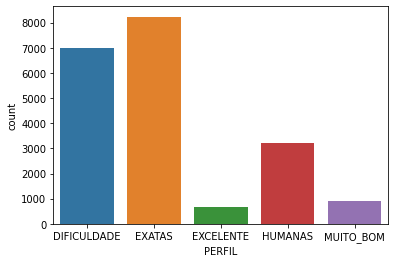

In [ ]:
sns.countplot(dados['PERFIL'].sort_values())

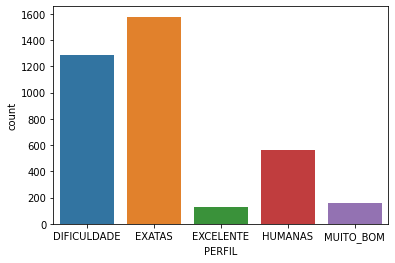

In [ ]:
sns.countplot(nota_go_nan['PERFIL'].sort_values())

In [ ]:
#função para criar heatmap
def criar_heatmap(corr):
  # Generate a mask for the upper triangle
  mask = np.triu(np.ones_like(corr, dtype=np.bool))

  # Set up the matplotlib figure
  f, ax = plt.subplots(figsize=(11, 9))

  # Generate a custom diverging colormap
  cmap = sns.diverging_palette(220, 10, as_cmap=True)

  # Draw the heatmap with the mask and correct aspect ratio
  sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

In [ ]:
dados2 = dados.copy()

In [ ]:
dados2['PERFIL'].unique()

array(['EXATAS', 'HUMANAS', 'DIFICULDADE', 'MUITO_BOM', 'EXCELENTE'],
      dtype=object)

In [ ]:
perfil = { 'EXATAS' : 1, 'HUMANAS' :2 , 'DIFICULDADE': 3, 'MUITO_BOM' : 4, 'EXCELENTE':5}
dados2['PERFIL'].replace(perfil, inplace=True)

In [ ]:
corr = dados2.corr()

In [ ]:
corr

,REPROVACOES_DE,REPROVACOES_EM,REPROVACOES_MF,REPROVACOES_GO,NOTA_DE,NOTA_EM,NOTA_MF,NOTA_GO,INGLES,H_AULA_PRES,TAREFAS_ONLINE,FALTAS,PERFIL
REPROVACOES_DE,1.000000,0.718194,0.627279,0.635341,-0.813435,-0.794798,-0.692948,-0.710445,0.056715,-0.055391,-0.085484,0.094888,0.310316
REPROVACOES_EM,0.718194,1.000000,0.630179,0.626988,-0.813435,-0.794798,-0.692389,-0.710117,0.060648,-0.065024,-0.086449,0.097509,0.310316
REPROVACOES_MF,0.627279,0.630179,1.000000,0.716056,-0.724459,-0.713168,-0.779373,-0.801010,0.065121,-0.064817,-0.090557,0.102211,0.334943
REPROVACOES_GO,0.635341,0.626988,0.716056,1.000000,-0.723049,-0.713200,-0.780861,-0.801819,0.069652,-0.069179,-0.090917,0.107030,0.334031
NOTA_DE,-0.813435,-0.813435,-0.724459,-0.723049,1.000000,0.969557,0.850942,0.867028,-0.106027,0.157820,0.158549,-0.176007,-0.310511
NOTA_EM,-0.794798,-0.794798,-0.713168,-0.713200,0.969557,1.000000,0.853037,0.869426,-0.115077,0.175144,0.167702,-0.178978,-0.275777
NOTA_MF,-0.692948,-0.692389,-0.779373,-0.780861,0.850942,0.853037,1.000000,0.948487,-0.128408,0.213406,0.186934,-0.200538,-0.200025
NOTA_GO,-0.710445,-0.710117,-0.801010,-0.801819,0.867028,0.869426,0.948487,1.000000,-0.116421,0.181685,0.169990,-0.180111,-0.284192
INGLES,0.056715,0.060648,0.065121,0.069652,-0.106027,-0.115077,-0.128408,-0.116421,1.000000,-0.174072,-0.149433,0.141218,-0.061068
H_AULA_PRES,-0.055391,-0.065024,-0.064817,-0.069179,0.157820,0.175144,0.213406,0.181685,-0.174072,1.000000,0.349416,-0.349608,0.188316


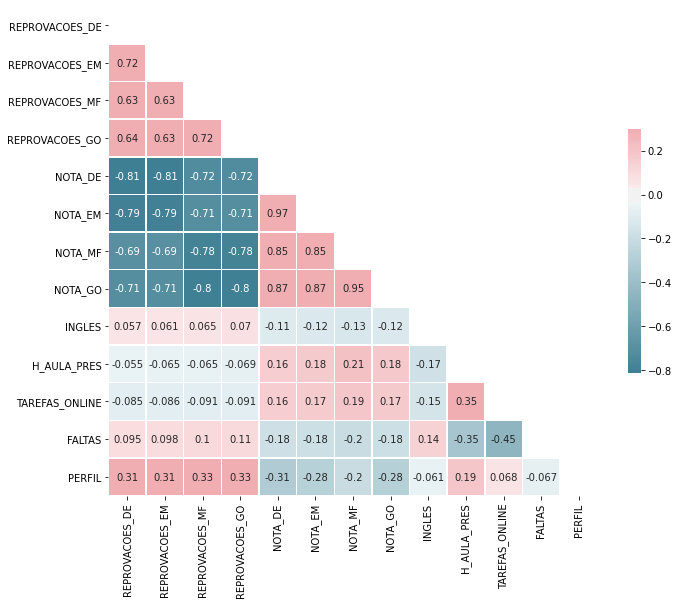

In [ ]:
criar_heatmap(corr)

In [ ]:
from sklearn.feature_selection import RFECV

In [ ]:
dados2.fillna(-1, inplace=True)

In [ ]:
Y = dados2['PERFIL']

In [ ]:
X = dados2.drop(['PERFIL'], axis='columns')

In [ ]:

rfe = RFECV(RandomForestClassifier())

In [ ]:
rfe.fit(X,Y)

RFECV(cv=None,
      estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                       class_weight=None, criterion='gini',
                                       max_depth=None, max_features='auto',
                                       max_leaf_nodes=None, max_samples=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=100, n_jobs=None,
                                       oob_score=False, random_state=None,
                                       verbose=0, warm_start=False),
      min_features_to_select=1, n_jobs=None, scoring=None, step=1, verbose=0)

In [ ]:
dados1 = dados.fillna(-1)
X_1 = dados1.drop(['PERFIL'],axis='columns')
Y_1 = dados1['PERFIL']

In [ ]:
X_1.head()

,REPROVACOES_DE,REPROVACOES_EM,REPROVACOES_MF,REPROVACOES_GO,NOTA_DE,NOTA_EM,NOTA_MF,NOTA_GO,INGLES,H_AULA_PRES,TAREFAS_ONLINE,FALTAS
MATRICULA,,,,,,,,,,,,
502375,0,0,0,0,6.2,5.8,4.6,5.9,0.0,2,4,3
397093,0,0,0,0,6.0,6.2,5.2,4.5,1.0,2,4,3
915288,0,0,0,0,7.3,6.7,7.1,7.2,0.0,5,0,3
192652,1,3,1,1,0.0,0.0,0.0,0.0,1.0,4,4,4
949491,1,3,1,1,0.0,0.0,0.0,0.0,1.0,5,2,5


In [ ]:
colunas = pd.DataFrame({'coluna':X.columns,
              'bool': rfe.support_})

In [ ]:
rfe.n_features_

10

In [ ]:
colunas

,coluna,bool
0,REPROVACOES_DE,False
1,REPROVACOES_EM,False
2,REPROVACOES_MF,True
3,REPROVACOES_GO,True
4,NOTA_DE,True
5,NOTA_EM,True
6,NOTA_MF,True
7,NOTA_GO,True
8,INGLES,True
9,H_AULA_PRES,True


In [ ]:
rfe.fit(X_1, Y_1)

RFECV(cv=None,
      estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                       class_weight=None, criterion='gini',
                                       max_depth=None, max_features='auto',
                                       max_leaf_nodes=None, max_samples=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=100, n_jobs=None,
                                       oob_score=False, random_state=None,
                                       verbose=0, warm_start=False),
      min_features_to_select=1, n_jobs=None, scoring=None, step=1, verbose=0)

In [ ]:
colunas2 = pd.DataFrame({'coluna':X_1.columns,
              'bool': rfe.support_})

In [ ]:
colunas2

,coluna,bool
0,REPROVACOES_DE,True
1,REPROVACOES_EM,True
2,REPROVACOES_MF,True
3,REPROVACOES_GO,True
4,NOTA_DE,True
5,NOTA_EM,True
6,NOTA_MF,True
7,NOTA_GO,True
8,INGLES,True
9,H_AULA_PRES,True


In [ ]:
rf = RandomForestClassifier(random_state=42)

In [ ]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X_1, Y_1)

In [ ]:
X_treino.shape

(15000, 12)

In [ ]:
X_teste.shape

(5000, 12)

In [ ]:
rf.fit(X_treino, y_treino)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
y_previsto = rf.predict(X_teste)

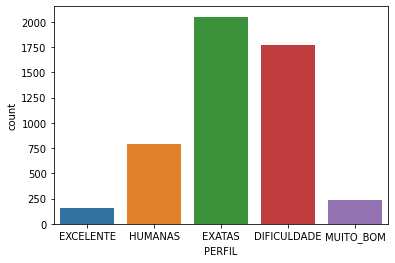

In [ ]:
sns.countplot(y_teste)

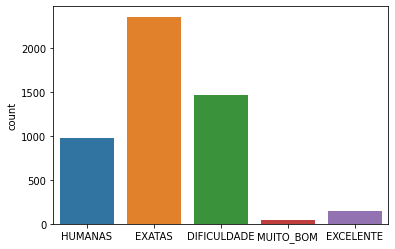

In [ ]:
sns.countplot(y_previsto)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_teste, y_previsto)

0.808

In [ ]:
#preprocessando
from sklearn.preprocessing import StandardScaler
pre = StandardScaler()


In [ ]:
X_2 = pre.fit_transform(X_1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_1, Y_1)

In [ ]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
y_previsto_pre = rf.predict(X_test)

In [ ]:
accuracy_score(y_test, y_previsto_pre)

0.7972

In [ ]:
class Balanceamento(BaseEstimator, TransformerMixin):
    def __init__(self, X, y):
        self.X = X
        self.y = y
        
    
    def fit(self, X, y):
        return self

    def transform(self, X, y):
        from imblearn.over_sampling import SMOTE
        smote = SMOTE(sampling_strategy='all')
        # Primeiro realizamos a cópia do dataframe 'X' de entrada
        self.X, self.y = smote.fit_resample(X,y)
        # Retornamos um novo dataframe sem as colunas indesejadas
        return self.X, self.y
    

In [ ]:
XB,YB = Balanceamento(X_1,Y_1).transform(X_1,Y_1)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(XB, YB)

In [ ]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
y_prev_balanceado = rf.predict(X_test)

In [ ]:
y_prev_sem_balanceamento = rf.predict(X_teste)

In [ ]:
accuracy_score(y_test, y_prev_balanceado)

0.8815124416796267

In [ ]:
accuracy_score(y_teste, y_prev_sem_balanceamento)

0.9552

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
etc = ExtraTreesClassifier(random_state=42,)

In [ ]:
etc.fit(X_train, y_train)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=42, verbose=0,
                     warm_start=False)

In [ ]:
ada = AdaBoostClassifier(base_estimator = ExtraTreesClassifier(random_state=42))

In [ ]:
ada.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=ExtraTreesClassifier(bootstrap=False,
                                                       ccp_alpha=0.0,
                                                       class_weight=None,
                                                       criterion='gini',
                                                       max_depth=None,
                                                       max_features='auto',
                                                       max_leaf_nodes=None,
                                                       max_samples=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_wei

In [ ]:
y_prev_etc = ada.predict(X_test)

In [ ]:
y_prev_sem_balanceamento = etc.predict(X_teste)

In [ ]:
accuracy_score(y_test, y_prev_etc)

0.901049766718507

In [ ]:
accuracy_score(y_teste, y_prev_sem_balanceamento)

0.9598

In [ ]:
from sklearn.linear_model import LogisticRegressionCV

In [ ]:
rl = LogisticRegressionCV(random_state=42)

In [ ]:
rl.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='auto', n_jobs=None,
                     penalty='l2', random_state=42, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

In [ ]:
y_prev_rl = rl.predict(X_test)

In [ ]:
y_prev_sem_balanceamento = rl.predict(X_teste)

In [ ]:
accuracy_score(y_test, y_prev_etc)

0.901049766718507

In [ ]:
accuracy_score(y_teste, y_prev_sem_balanceamento)

0.7484

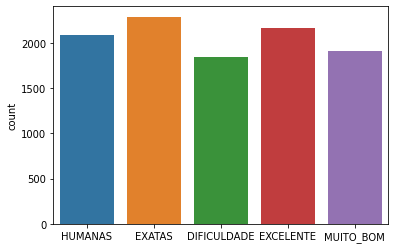

In [ ]:
sns.countplot(y_prev_balanceado)

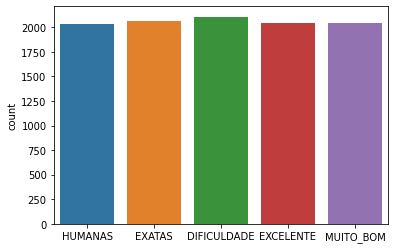

In [ ]:
sns.countplot(y_test)

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
estimators=[('etc', ExtraTreesClassifier(random_state=42)),
            ('rf', RandomForestClassifier(random_state=42)),
            ('gbc', GradientBoostingClassifier(random_state=42)),
            ('svr', make_pipeline(StandardScaler(),
                        LinearSVC(random_state=42)))]
dtc_model = StackingClassifier(estimators=estimators, final_estimator = LogisticRegression())  # O modelo será criado com os parâmetros padrões da biblioteca

In [ ]:
dtc_model.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

StackingClassifier(cv=None,
                   estimators=[('etc',
                                ExtraTreesClassifier(bootstrap=False,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features='auto',
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_we

In [ ]:
previsao_dtc = dtc_model.predict(X_teste)

In [ ]:
accuracy_score(y_teste, previsao_dtc)

0.9596

In [ ]:
dados['Y_PREVISTO'] = etc.predict(X_1)

In [ ]:
dados.sample(35)

,REPROVACOES_DE,REPROVACOES_EM,REPROVACOES_MF,REPROVACOES_GO,NOTA_DE,NOTA_EM,NOTA_MF,NOTA_GO,INGLES,H_AULA_PRES,TAREFAS_ONLINE,FALTAS,PERFIL,Y_PREVISTO
MATRICULA,,,,,,,,,,,,,,
271754,1,1,1,1,0.0,0.0,0.0,0.0,1.0,6,5,2,DIFICULDADE,DIFICULDADE
292896,1,1,1,1,0.0,0.0,0.0,0.0,1.0,8,3,5,DIFICULDADE,DIFICULDADE
945396,0,0,0,0,5.7,5.6,6.0,5.4,0.0,2,0,5,EXATAS,EXATAS
592644,0,0,0,0,6.0,6.1,7.5,NaN,NaN,3,2,3,HUMANAS,HUMANAS
420766,0,0,0,0,5.5,6.1,5.8,4.6,0.0,5,0,7,EXATAS,EXATAS
883325,0,0,0,0,5.0,4.5,5.1,5.3,0.0,3,5,3,EXATAS,EXATAS
108264,0,0,0,0,6.9,5.5,5.9,5.2,1.0,9,4,4,EXATAS,EXATAS
871243,3,3,1,3,0.0,0.0,0.0,0.0,1.0,2,4,4,DIFICULDADE,DIFICULDADE
448065,0,0,0,0,7.2,8.2,8.0,7.3,1.0,9,4,1,EXCELENTE,EXCELENTE


In [ ]:
erro = dados.loc[dados.PERFIL != dados.Y_PREVISTO]

In [ ]:
erro.shape[0]/dados.shape[0]

0.0401

In [ ]:
    """
    >>> from collections import Counter
    >>> from sklearn.datasets import make_classification
    >>> from sklearn.model_selection import train_test_split as tts
    >>> from sklearn.decomposition import PCA
    >>> from sklearn.neighbors import KNeighborsClassifier as KNN
    >>> from sklearn.metrics import classification_report
    >>> from imblearn.over_sampling import SMOTE
    >>> from imblearn.pipeline import Pipeline # doctest: +NORMALIZE_WHITESPACE
    >>> X, y = make_classification(n_classes=2, class_sep=2,
    ... weights=[0.1, 0.9], n_informative=3, n_redundant=1, flip_y=0,
    ... n_features=20, n_clusters_per_class=1, n_samples=1000, random_state=10)
    >>> print('Original dataset shape {}'.format(Counter(y)))
    Original dataset shape Counter({1: 900, 0: 100})
    >>> pca = PCA()
    >>> smt = SMOTE(random_state=42)
    >>> knn = KNN()
    >>> pipeline = Pipeline([('smt', smt), ('pca', pca), ('knn', knn)])
    >>> X_train, X_test, y_train, y_test = tts(X, y, random_state=42)
    >>> pipeline.fit(X_train, y_train) # doctest: +ELLIPSIS
    Pipeline(...)
    >>> y_hat = pipeline.predict(X_test)
    >>> print(classification_report(y_test, y_hat))
    """

"\nfrom collections import Counter\nfrom sklearn.datasets import make_classification\nfrom sklearn.model_selection import train_test_split as tts\nfrom sklearn.decomposition import PCA\nfrom sklearn.neighbors import KNeighborsClassifier as KNN\nfrom sklearn.metrics import classification_report\nfrom imblearn.over_sampling import SMOTE\nfrom imblearn.pipeline import Pipeline # doctest: +NORMALIZE_WHITESPACE\nX, y = make_classification(n_classes=2, class_sep=2,\nweights=[0.1, 0.9], n_informative=3, n_redundant=1, flip_y=0,\nn_features=20, n_clusters_per_class=1, n_samples=1000, random_state=10)\nprint('Original dataset shape {}'.format(Counter(y)))\nOriginal dataset shape Counter({1: 900, 0: 100})\npca = PCA()\nsmt = SMOTE(random_state=42)\nknn = KNN()\npipeline = Pipeline([('smt', smt), ('pca', pca), ('knn', knn)])\nX_train, X_test, y_train, y_test = tts(X, y, random_state=42)\npipeline.fit(X_train, y_train) # doctest: +ELLIPSIS\nPipeline(...)\ny_hat = pipeline.predict(X_test)\nprint(cl